## BoomBikes
### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demands

### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read from given day dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing day.csv
bikes = pd.read_csv('day.csv')

In [7]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikes.shape

(730, 16)

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


dteday column is not requires for analysis, since it is unique and values are already derived from this

Removing dteday and instant column for analysis

In [11]:
bikes.drop(['dteday','instant'],axis =1, inplace = True)

### Step 2: Visualising the Data

Understanding the data.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

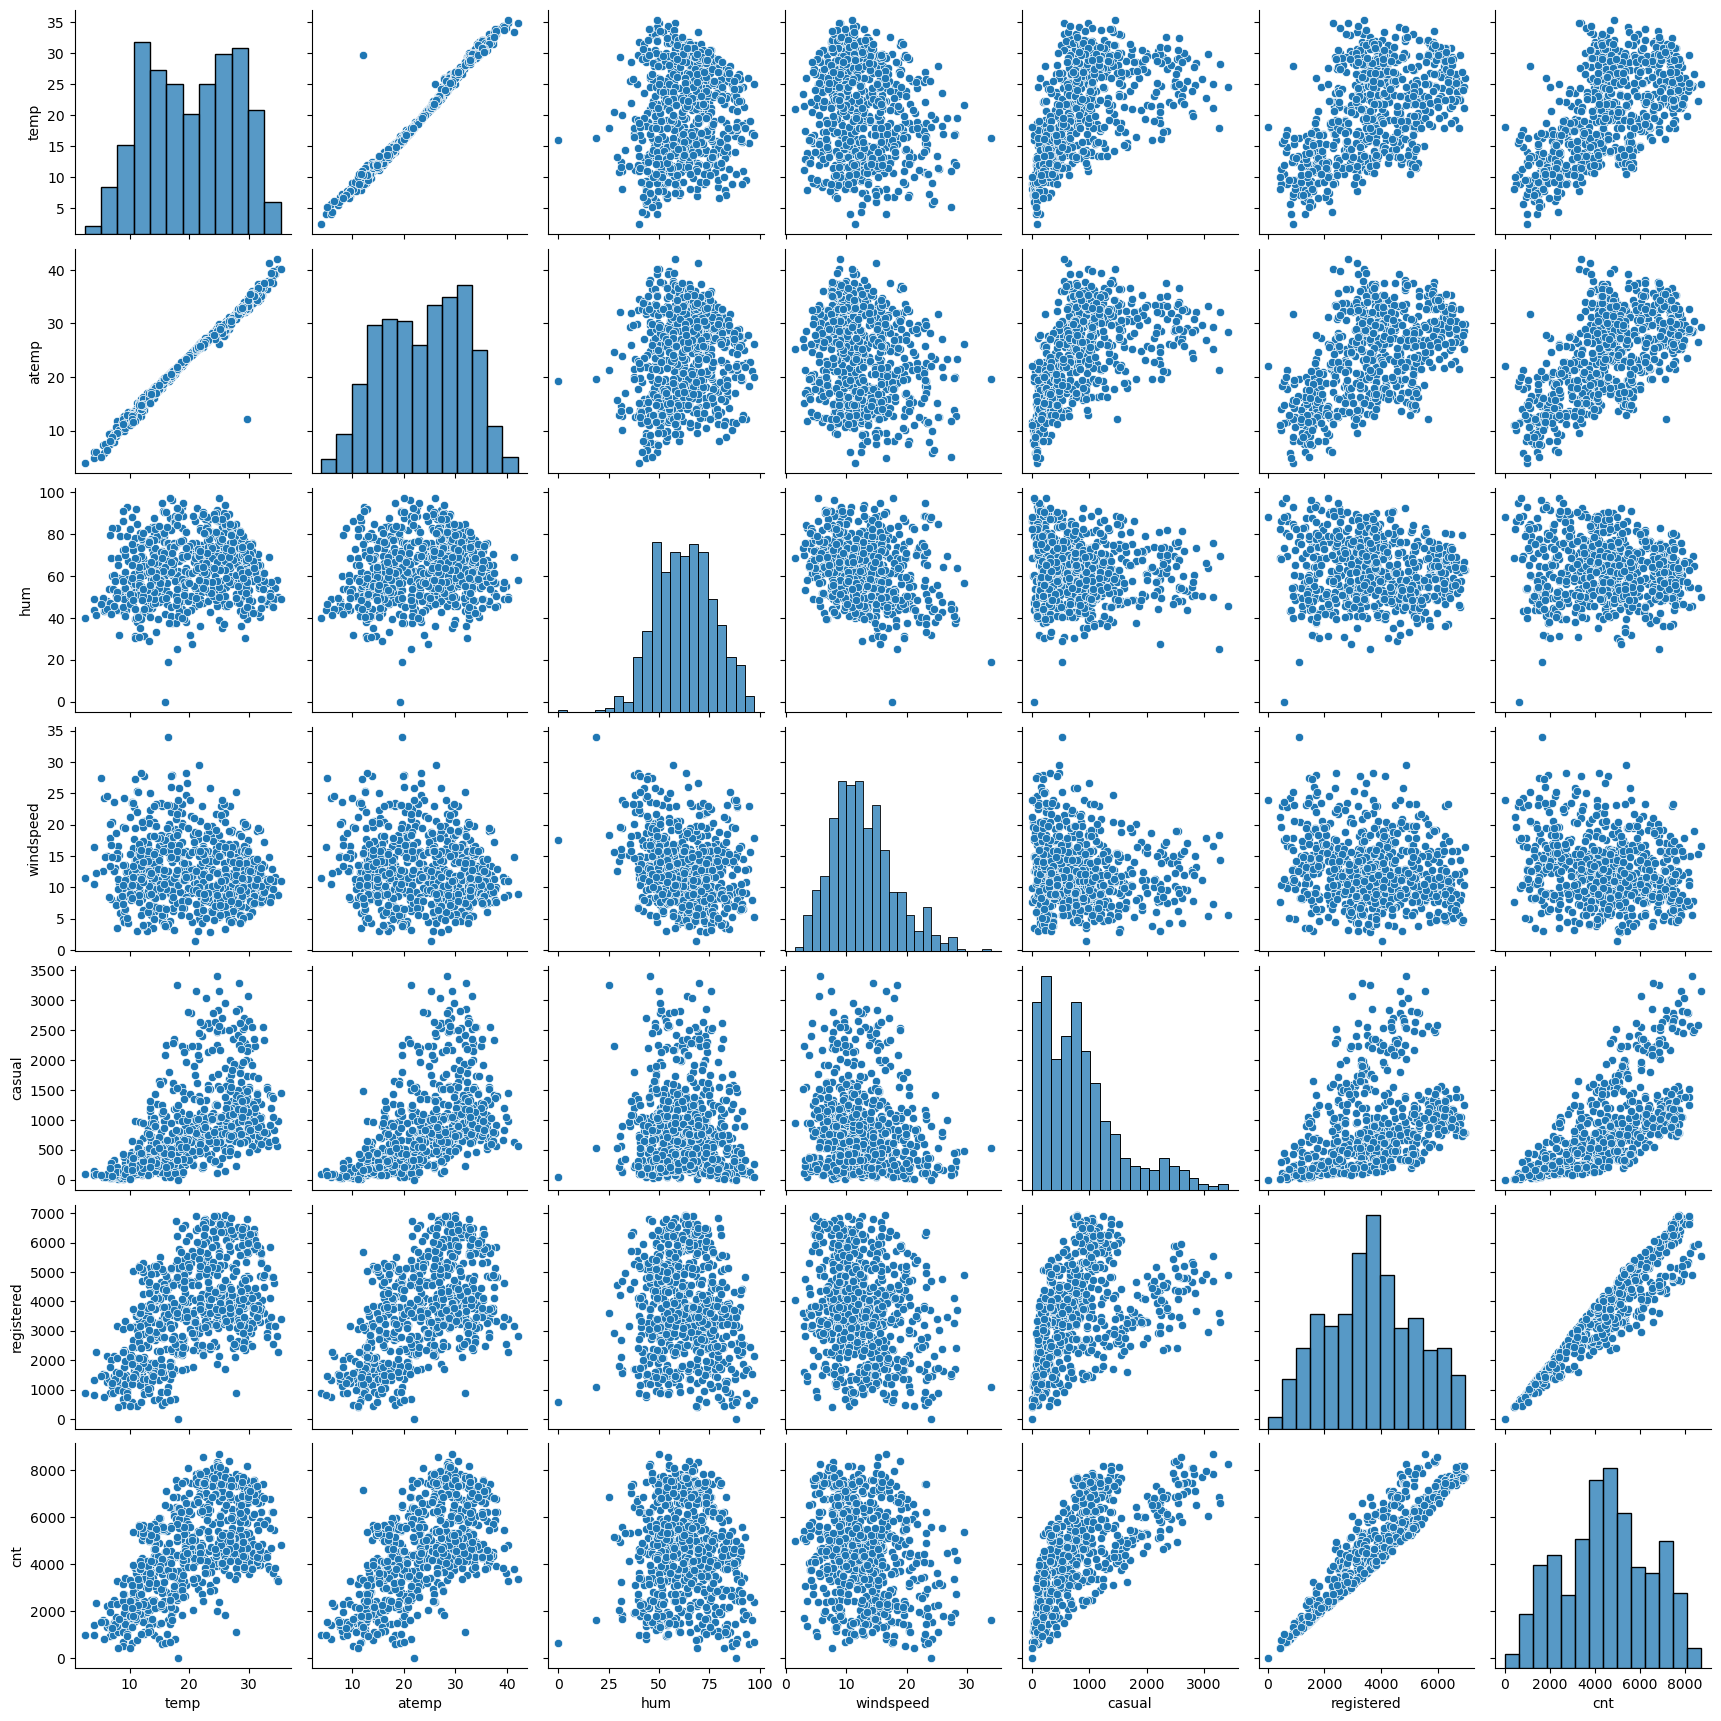

In [13]:
varlist =  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']
sns.pairplot(bikes[varlist])
plt.show()

### Few insights from above graph
1. temp and atemp are highly correlate to each other
2. registered also correlate qith cnt

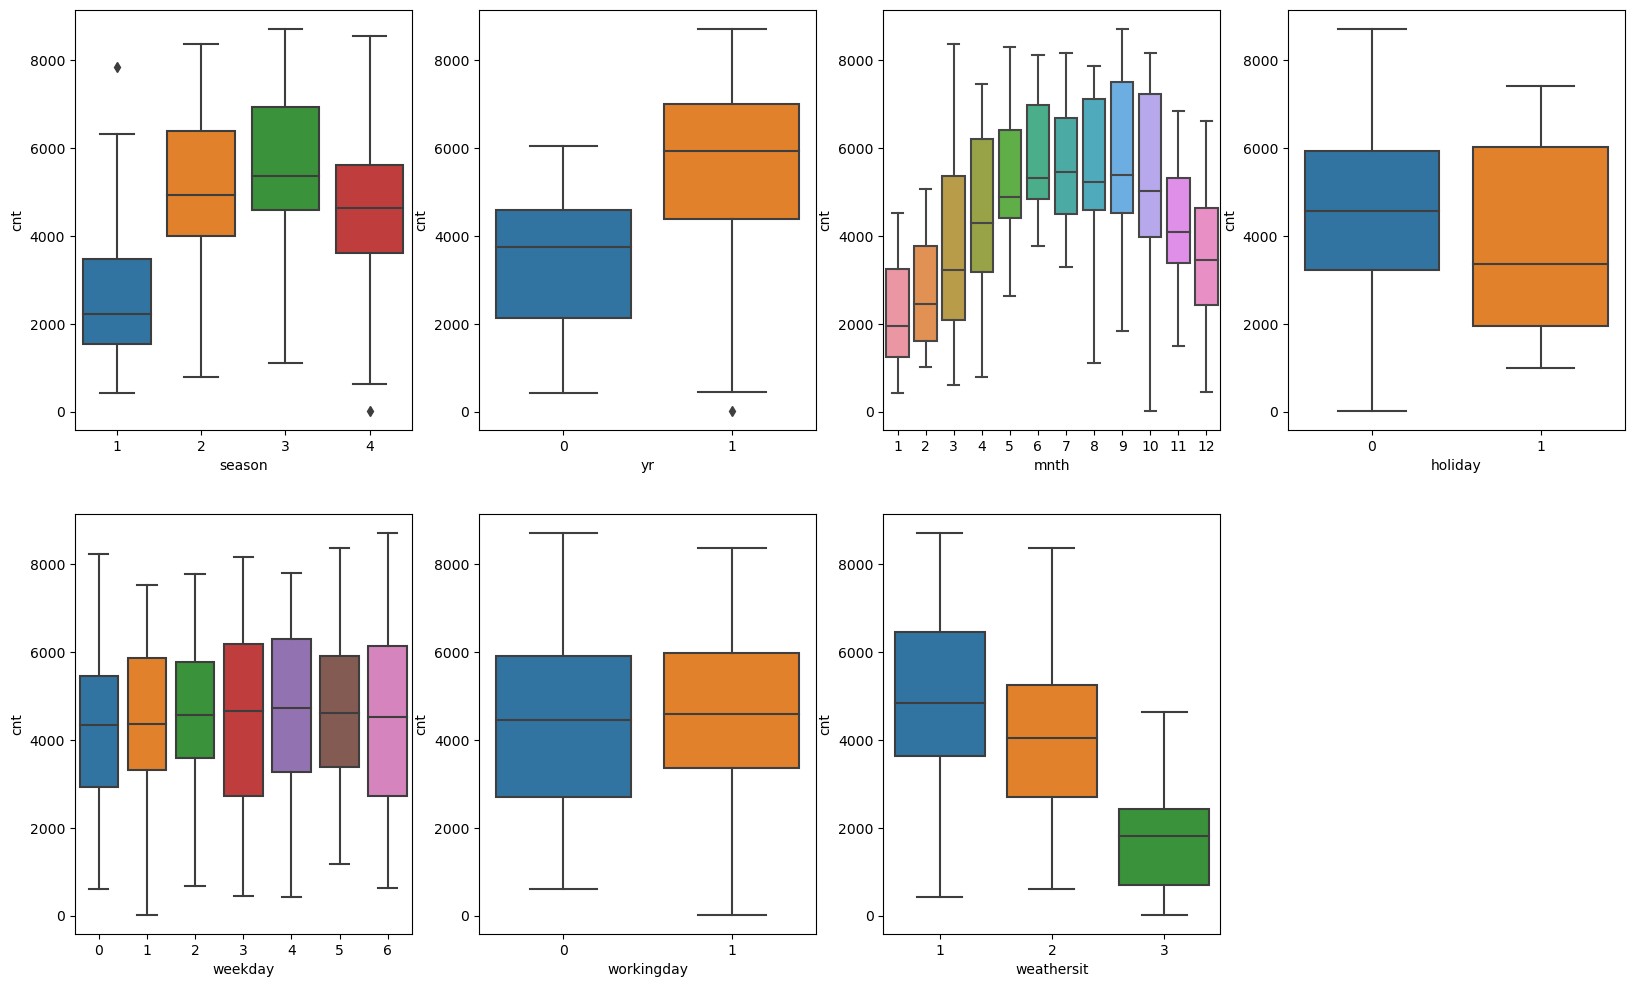

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes) 
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

1. Sesaon fall has highest number booking compare to other
2. 2019 has more bookings than 2018
3. When weather is Clear, Few clouds, Partly cloudy, Partly cloudy has high number of bookings

## Step 3: Data Preparation
Data preparation is not required since all categorical values are already converted to numarical and dummy values are also not required
Meta data as follows
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Step 4: Splitting the Data into Training and Testing Sets

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
- we will use MinMax scaling.

In [17]:
scaler = MinMaxScaler()

In [18]:
# Apply scaler() to all the columns continious columns

num_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.507843,0.504456,0.025490,0.498366,0.676471,0.20098,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.370649,0.500429,0.315338,0.157763,0.336182,0.468282,0.27377,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.00000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.00000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.50000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


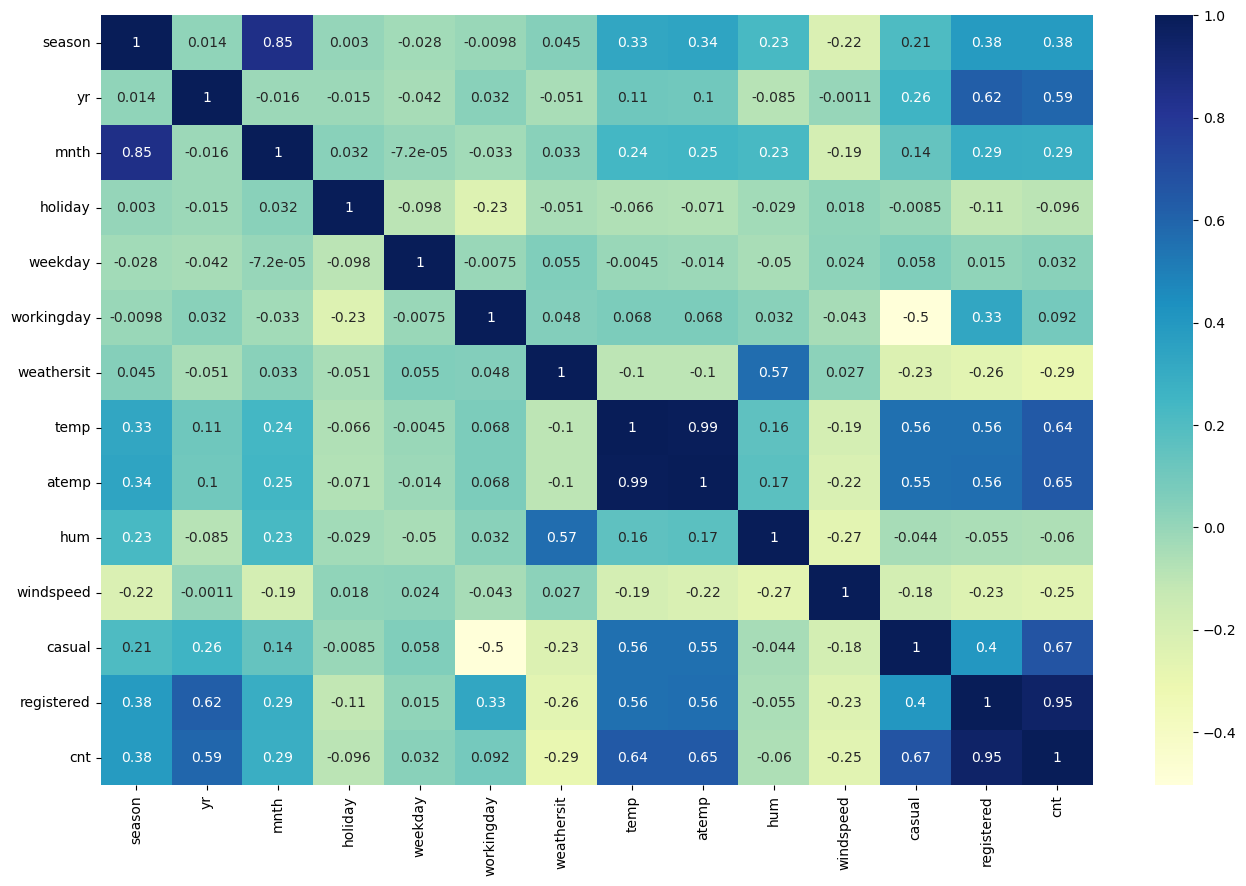

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

temparature is highly correlate with total number of bike bookings from above correlation graph

### Dividing into X and Y sets for the model building

In [21]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a Multi Leaner Regression model 
MLR model by removing correlated predictors

In [22]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         1.364360e-15
season        6.600623e-16
yr            4.666406e-16
mnth         -4.640385e-17
holiday      -2.645453e-17
weekday       4.750974e-16
workingday    2.927346e-16
weathersit   -4.137315e-16
temp          1.391248e-15
atemp        -9.107298e-16
hum           1.049508e-15
windspeed    -2.602085e-18
casual        3.774735e-01
registered    7.968247e-01
dtype: float64

In [23]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.508e+29
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:53:14   Log-Likelihood:                 16242.
No. Observations:                 510   AIC:                        -3.246e+04
Df Residuals:                     496   BIC:                        -3.240e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.364e-15    1.2e-15      1.136      0.2

#### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

In [24]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,350.72
7,temp,335.54
12,registered,40.49
9,hum,16.66
2,mnth,13.43
0,season,12.26
5,workingday,10.06
11,casual,9.09
1,yr,5.72
10,windspeed,3.81


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model


#### Dropping atemp it has high VIF 350.72 and P-value 0.867



In [26]:
# Build a third fitted model
X_train = X_train.drop('atemp', 1,)
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.256e+30
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:53:16   Log-Likelihood:                 17209.
No. Observations:                 510   AIC:                        -3.439e+04
Df Residuals:                     497   BIC:                        -3.434e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.314e-16    1.8e-16     -0.731      0.4

In [27]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,registered,40.18
7,temp,16.37
8,hum,15.96
2,mnth,13.43
0,season,12.26
5,workingday,10.06
10,casual,9.09
1,yr,5.69
9,windspeed,3.74
4,weekday,3.19


Dropping temp it has high VIF 16.37 and P-value 0.812

In [28]:
X_train = X_train.drop('temp', 1,)
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.930e+30
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:53:17   Log-Likelihood:                 17030.
No. Observations:                 510   AIC:                        -3.404e+04
Df Residuals:                     498   BIC:                        -3.399e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.934e-17   2.54e-16     -0.351      0.7

In [29]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,registered,35.27
7,hum,15.20
2,mnth,13.42
0,season,12.26
5,workingday,9.86
9,casual,7.26
1,yr,4.95
8,windspeed,3.70
4,weekday,3.16
6,weathersit,2.65


Dropping registered since it has  VIF  35.27

In [30]:
X_train = X_train.drop('registered', 1,)
X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     379.6
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          5.85e-226
Time:                        06:53:18   Log-Likelihood:                 587.41
No. Observations:                 510   AIC:                            -1153.
Df Residuals:                     499   BIC:                            -1106.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0392      0.025      1.539      0.1

In [31]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,15.02
2,mnth,13.39
0,season,11.25
5,workingday,4.33
9,casual,4.32
8,windspeed,3.65
4,weekday,3.13
6,weathersit,2.34
1,yr,2.31
3,holiday,1.11


Dropping hum since it has next high p-value as 0.705and VIF 15.02

In [32]:
X_train = X_train.drop('hum', 1,)
X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     422.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          2.97e-227
Time:                        06:53:19   Log-Likelihood:                 587.34
No. Observations:                 510   AIC:                            -1155.
Df Residuals:                     500   BIC:                            -1112.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0467      0.016      2.891      0.0

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mnth,12.47
0,season,11.21
7,windspeed,3.30
8,casual,3.22
5,workingday,3.09
4,weekday,3.07
1,yr,2.30
6,weathersit,1.57
3,holiday,1.07


holiday has mnth p-value as 0.325 and VIF as 12.47

In [34]:
X_train = X_train.drop('mnth', 1,)
X_train_lm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     475.2
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          2.14e-228
Time:                        06:53:20   Log-Likelihood:                 586.85
No. Observations:                 510   AIC:                            -1156.
Df Residuals:                     501   BIC:                            -1118.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0507      0.016      3.254      0.0

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,windspeed,3.23
7,casual,3.22
4,workingday,3.07
3,weekday,3.01
0,season,2.97
1,yr,2.30
5,weathersit,1.57
2,holiday,1.07


Droping holiday since it has p-value as 0.329 it is higher than 0.05

In [36]:
X_train = X_train.drop('holiday', 1,)
X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     543.0
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.43e-229
Time:                        06:53:21   Log-Likelihood:                 586.36
No. Observations:                 510   AIC:                            -1157.
Df Residuals:                     502   BIC:                            -1123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0544      0.015      3.598      0.0

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,casual,3.21
5,windspeed,3.15
2,weekday,3.01
3,workingday,2.97
0,season,2.93
1,yr,2.30
4,weathersit,1.57


weekday has p-value as 0.079 which is higher than 0.05 so we need to drop it

In [38]:
X_train = X_train.drop('weekday', 1,)
X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     630.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          2.55e-230
Time:                        06:53:28   Log-Likelihood:                 584.79
No. Observations:                 510   AIC:                            -1156.
Df Residuals:                     503   BIC:                            -1126.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0618      0.015      4.244      0.0

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,2.93
4,windspeed,2.91
5,casual,2.87
2,workingday,2.73
1,yr,2.29
3,weathersit,1.53


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [40]:
y_train_price = lr_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

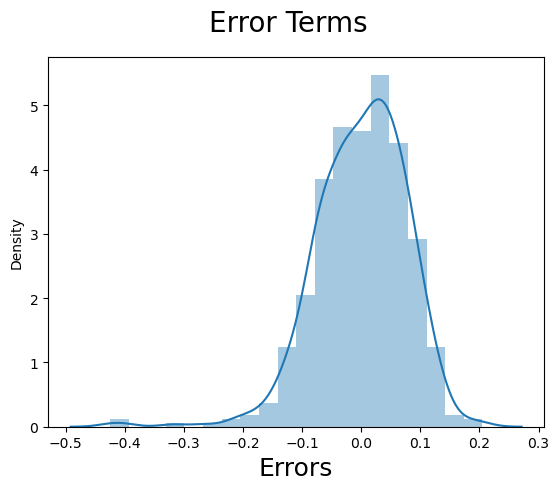

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [42]:
num_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [44]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.479452,0.497717,0.036530,0.503044,0.698630,0.187215,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592
std,0.369821,0.500722,0.311080,0.188034,0.331402,0.459904,0.269422,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [45]:
y_test = df_test.pop('cnt')
X_test = df_test

In [47]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [48]:
X_test_m4 = X_test_m4.drop(['mnth','holiday','temp','atemp','hum','registered','weekday'], axis = 1)

In [49]:

lr_test = sm.OLS(y_test, X_test_m4).fit()
# Print the summary of the model
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     201.4
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.13e-84
Time:                        06:57:46   Log-Likelihood:                 231.21
No. Observations:                 219   AIC:                            -448.4
Df Residuals:                     212   BIC:                            -424.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0549      0.024      2.274      0.0

In [50]:
y_pred_m4 = lr_7.predict(X_test_m4)

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

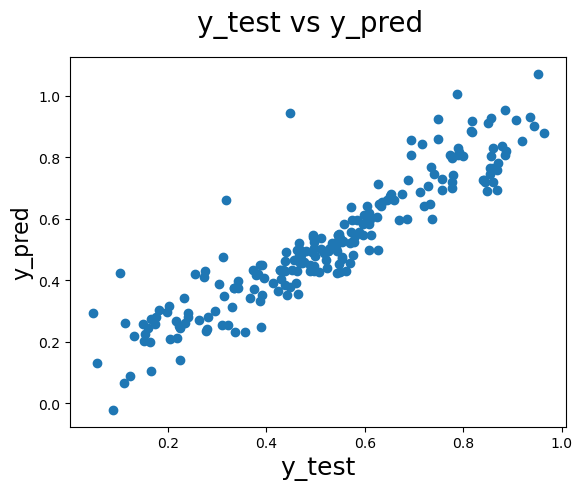

In [51]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      